In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

In [2]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [3]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [4]:
# Create Start and End Dates for 30 days Worth of Historical Data
end = datetime.now()
start = end + timedelta(-30)

# Data Collection

### China Stock Information 

In [5]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


ASHR (China SH Composite)  CQQQ (China Technology)  \
date                                                                            
2020-01-13 00:00:00+00:00                      30.88                    58.93   
2020-01-14 00:00:00+00:00                      30.64                    57.74   
2020-01-15 00:00:00+00:00                      30.41                    57.94   
2020-01-16 00:00:00+00:00                      30.44                    58.23   
2020-01-17 00:00:00+00:00                      30.61                    58.31   

                           CHIE (China Energy)  CHIM (China Materials)  \
date                                                                     
2020-01-13 00:00:00+00:00               11.015                  17.260   
2020-01-14 00:00:00+00:00               10.905                  17.430   
2020-01-15 00:00:00+00:00               10.925                  17.285   
2020-01-16 00:00:00+00:00               10.840                  17.190   
2020-01-17 00:00:00+00:00               10.755                  17.350   

                           KURE (China Healthcare)  \
date                                                 
2020-01-13 00:00:00+00:00                  24.4151   
2020-01-14 00:00:00+00:00                  24.1469   
2020-01-15 00:00:00+00:00                  24.1896   
2020-01-16 00:00:00+00:00                  24.5824   
2020-01-17 00:00:00+00:00                  25.0250   

                           CHIS (China Consumer Staples)  
date                                                      
2020-01-13 00:00:00+00:00                         22.750  
2020-01-14 00:00:00+00:00                         22.580  
2020-01-15 00:00:00+00:00                         22.620  
2020-01-16 00:00:00+00:00                         22.700  
2020-01-17 00:00:00+00:00                         22.655

In [6]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

#china_df.dropna(inplace=True)
#china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

### US Stock Information

In [7]:
# Create DataFrames for US
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})
us_df.head()

SPY (USA SP500 Composite)  IGM (USA Technology)  \
date                                                                         
2020-01-13 00:00:00+00:00                     327.95                253.39   
2020-01-14 00:00:00+00:00                     327.45                251.90   
2020-01-15 00:00:00+00:00                     328.19                252.33   
2020-01-16 00:00:00+00:00                     330.92                255.19   
2020-01-17 00:00:00+00:00                     331.95                256.54   

                           IYE (USA Energy)  IYM (USA Materials)  \
date                                                               
2020-01-13 00:00:00+00:00             31.92                95.85   
2020-01-14 00:00:00+00:00             31.94                95.86   
2020-01-15 00:00:00+00:00             31.75                96.25   
2020-01-16 00:00:00+00:00             31.76                96.62   
2020-01-17 00:00:00+00:00             31.55                96.85   

                           IYH (USA Healthcare)  IECS (USA Consumer Staples)  
date                                                                          
2020-01-13 00:00:00+00:00                216.87                       28.803  
2020-01-14 00:00:00+00:00                218.16                       28.788  
2020-01-15 00:00:00+00:00                220.01                       29.007  
2020-01-16 00:00:00+00:00                221.23                       29.160  
2020-01-17 00:00:00+00:00                221.26                       29.269

In [8]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

#usus_df.dropna(inplace=True)
#us_df.isnull().sum()

SPY (USA SP500 Composite)      0
IGM (USA Technology)           0
IYE (USA Energy)               0
IYM (USA Materials)            0
IYH (USA Healthcare)           0
IECS (USA Consumer Staples)    0
dtype: int64

# Monte Carlo Simulations ~1 year

### China Monte Carlo Simulation

In [9]:
# Calculate the Daily Returns for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

ASHR (China SH Composite)  CQQQ (China Technology)  \
date                                                                            
2020-01-13 00:00:00+00:00                        NaN                      NaN   
2020-01-14 00:00:00+00:00                  -0.007772                -0.020193   
2020-01-15 00:00:00+00:00                  -0.007507                 0.003464   
2020-01-16 00:00:00+00:00                   0.000987                 0.005005   
2020-01-17 00:00:00+00:00                   0.005585                 0.001374   

                           CHIE (China Energy)  CHIM (China Materials)  \
date                                                                     
2020-01-13 00:00:00+00:00                  NaN                     NaN   
2020-01-14 00:00:00+00:00            -0.009986                0.009849   
2020-01-15 00:00:00+00:00             0.001834               -0.008319   
2020-01-16 00:00:00+00:00            -0.007780               -0.005496   
2020-01-17 00:00:00+00:00            -0.007841                0.009308   

                           KURE (China Healthcare)  \
date                                                 
2020-01-13 00:00:00+00:00                      NaN   
2020-01-14 00:00:00+00:00                -0.010985   
2020-01-15 00:00:00+00:00                 0.001768   
2020-01-16 00:00:00+00:00                 0.016238   
2020-01-17 00:00:00+00:00                 0.018005   

                           CHIS (China Consumer Staples)  
date                                                      
2020-01-13 00:00:00+00:00                            NaN  
2020-01-14 00:00:00+00:00                      -0.007473  
2020-01-15 00:00:00+00:00                       0.001771  
2020-01-16 00:00:00+00:00                       0.003537  
2020-01-17 00:00:00+00:00                      -0.001982

In [10]:
# Calculate the Value of Average Daily Returns
##avg_daily_returns_ashr = china_daily_returns.mean()['ASHR (China SH Composite)']
avg_daily_returns_cqqq = china_daily_returns.mean()['CQQQ (China Technology)']
avg_daily_returns_chie = china_daily_returns.mean()['CHIE (China Energy)']
avg_daily_returns_chim = china_daily_returns.mean()['CHIM (China Materials)']
avg_daily_returns_kure = china_daily_returns.mean()['KURE (China Healthcare)']
avg_daily_returns_chis = china_daily_returns.mean()['CHIS (China Consumer Staples)']

# Calculate the Standard Deviation 
##std_daily_returns_ashr = china_daily_returns.std()['ASHR China SH Composite']
std_daily_returns_cqqq = china_daily_returns.std()['CQQQ (China Technology)']
std_daily_returns_chie = china_daily_returns.std()['CHIE (China Energy)']
std_daily_returns_chim = china_daily_returns.std()['CHIM (China Materials)']
std_daily_returns_kure = china_daily_returns.std()['KURE (China Healthcare)']
std_daily_returns_chis = china_daily_returns.std()['CHIS (China Consumer Staples)']

# Save the Last Day's Closing Price
##ashr_last_price = china_df['ASHR China SH Composite'][-1]
cqqq_last_price = china_df['CQQQ (China Technology)'][-1]
chie_last_price = china_df['CHIE (China Energy)'][-1]
chim_last_price = china_df['CHIM (China Materials)'][-1]
kure_last_price = china_df['KURE (China Healthcare)'][-1]
chis_last_price = china_df['CHIS (China Consumer Staples)'][-1]

In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [12]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    ##simulated_ashr_prices = [ashr_last_price]
    simulated_cqqq_prices = [cqqq_last_price]
    simulated_chie_prices = [chie_last_price]
    simulated_chim_prices = [chim_last_price]
    simulated_kure_prices = [kure_last_price]
    simulated_chis_prices = [chis_last_price]
    
    for y in range (number_records):
        ##simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        simulated_cqqq_price = simulated_cqqq_prices[-1] * (1 + np.random.normal(avg_daily_returns_cqqq, std_daily_returns_cqqq))
        simulated_chie_price = simulated_chie_prices[-1] * (1 + np.random.normal(avg_daily_returns_chie, std_daily_returns_chie))
        simulated_chim_price = simulated_chim_prices[-1] * (1 + np.random.normal(avg_daily_returns_chim, std_daily_returns_chim))
        simulated_kure_price = simulated_kure_prices[-1] * (1 + np.random.normal(avg_daily_returns_kure, std_daily_returns_kure))
        simulated_chis_price = simulated_chis_prices[-1] * (1 + np.random.normal(avg_daily_returns_chis, std_daily_returns_chis))
       
        ##simulated_ashr_prices.append(simulated_ashr_price)
        simulated_cqqq_prices.append(simulated_cqqq_price)
        simulated_chie_prices.append(simulated_chie_price)
        simulated_chim_prices.append(simulated_chim_price)
        simulated_kure_prices.append(simulated_kure_price)
        simulated_chis_prices.append(simulated_chis_price)
    
    ##monte_carlo['ASHR China SH Composite prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['CQQQ (China Technology) prices'] = pd.Series(simulated_cqqq_prices)
    monte_carlo['CHIE (China Energy) prices'] = pd.Series(simulated_chie_prices)
    monte_carlo['CHIM (China Materials) prices'] = pd.Series(simulated_chim_prices)
    monte_carlo['KURE (China Healthcare) prices'] = pd.Series(simulated_kure_prices)
    monte_carlo['CHIS (China Consumer Staples) prices'] = pd.Series(simulated_chis_prices)
    
    simulated_china_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    china_portfolio_daily_returns = simulated_china_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + china_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.007099  0.002320 -0.014676  0.002573  0.010157  0.014488  0.027482   
2 -0.009684 -0.000081 -0.010877  0.008790  0.003678  0.012890  0.026740   
3 -0.000070  0.001377 -0.010456  0.003770  0.009642 -0.013130  0.009425   
4 -0.008796 -0.000337 -0.021986  0.003178  0.006760 -0.022526  0.011567   

        7         8         9    ...       490       491       492       493  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.006737 -0.013217 -0.009096  ... -0.003807 -0.003081 -0.015607  0.002264   
2 -0.002328 -0.016740 -0.000019  ...  0.010197  0.000455 -0.005838 -0.001039   
3 -0.018884 -0.040360 -0.005476  ... -0.003795  0.004921 -0.014780 -0.011087   
4 -0.014850 -0.029054 -0.009944  ... -0.004529  0.006981 -0.018083 -0.023926   

        494       495       496       497       498       499  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.011070 -0.022625 -0.008218  0.009838 -0.008912  0.000636  
2  0.009070 -0.022733 -0.019361  0.005610  0.003893 -0.009961  
3  0.023087 -0.016483 -0.021820  0.020136  0.005019 -0.011659  
4  0.028294 -0.014765 -0.000237  0.015742  0.010042 -0.002286  

[5 rows x 500 columns]

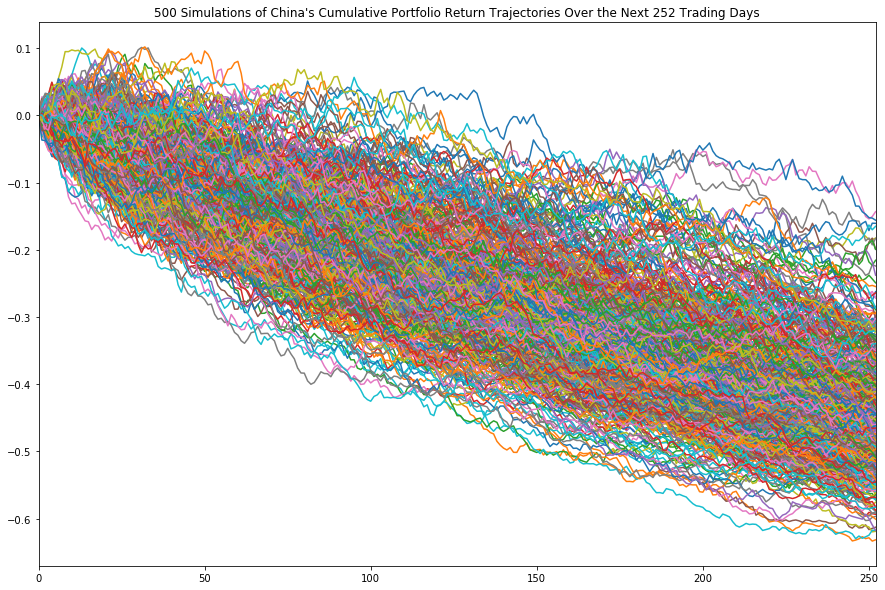

In [13]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of China's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))

### US Monte Carlo Simulation 

In [14]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

SPY (USA SP500 Composite)  IGM (USA Technology)  \
date                                                                         
2020-01-13 00:00:00+00:00                        NaN                   NaN   
2020-01-14 00:00:00+00:00                  -0.001525             -0.005880   
2020-01-15 00:00:00+00:00                   0.002260              0.001707   
2020-01-16 00:00:00+00:00                   0.008318              0.011334   
2020-01-17 00:00:00+00:00                   0.003113              0.005290   

                           IYE (USA Energy)  IYM (USA Materials)  \
date                                                               
2020-01-13 00:00:00+00:00               NaN                  NaN   
2020-01-14 00:00:00+00:00          0.000627             0.000104   
2020-01-15 00:00:00+00:00         -0.005949             0.004068   
2020-01-16 00:00:00+00:00          0.000315             0.003844   
2020-01-17 00:00:00+00:00         -0.006612             0.002380   

                           IYH (USA Healthcare)  IECS (USA Consumer Staples)  
date                                                                          
2020-01-13 00:00:00+00:00                   NaN                          NaN  
2020-01-14 00:00:00+00:00              0.005948                    -0.000521  
2020-01-15 00:00:00+00:00              0.008480                     0.007607  
2020-01-16 00:00:00+00:00              0.005545                     0.005275  
2020-01-17 00:00:00+00:00              0.000136                     0.003738

In [15]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY (USA SP500 Composite)']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (USA Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (USA Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (USA Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (USA Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (USA Consumer Staples)']

# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY (USA SP500 Composite)']
std_daily_returns_igm = us_daily_returns.std()['IGM (USA Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (USA Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (USA Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (USA Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (USA Consumer Staples)']

# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY (USA SP500 Composite)'][-1]
igm_last_price = us_df['IGM (USA Technology)'][-1]
iye_last_price = us_df['IYE (USA Energy)'][-1]
iym_last_price = us_df['IYM (USA Materials)'][-1]
iyh_last_price = us_df['IYH (USA Healthcare)'][-1]
iecs_last_price = us_df['IECS (USA Consumer Staples)'][-1]

In [16]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [17]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY (USA SP500 Composite) prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (USA Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (USA Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (USA Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (USA Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (USA Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.001658  0.001459 -0.001007  0.002878  0.000813  0.007167 -0.007239   
2  0.007162 -0.004108 -0.007427 -0.001039  0.001751  0.017433 -0.010341   
3  0.022265 -0.005135 -0.007795 -0.003329  0.010710  0.009036 -0.012851   
4  0.026156 -0.005686 -0.002268 -0.000817  0.008232  0.009524 -0.016480   

        7         8         9    ...       490       491       492       493  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1 -0.002900  0.002670 -0.003052  ... -0.003434 -0.001868  0.003999  0.000746   
2  0.000819  0.006777  0.006422  ... -0.007023 -0.001774  0.002743 -0.007543   
3 -0.000286  0.000237  0.002642  ... -0.007483 -0.000597  0.006483  0.003291   
4 -0.011786  0.002462 -0.000059  ... -0.003899 -0.006223 -0.001216  0.001951   

        494       495       496       497       498       499  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -0.004234 -0.003322  0.002377  0.003853  0.003196  0.003493  
2 -0.015200 -0.002960  0.003598  0.001981  0.005047  0.008345  
3 -0.008314 -0.005256 -0.003926 -0.000604  0.016117  0.006775  
4 -0.018383 -0.004294 -0.000528 -0.004221  0.008849  0.000874  

[5 rows x 500 columns]

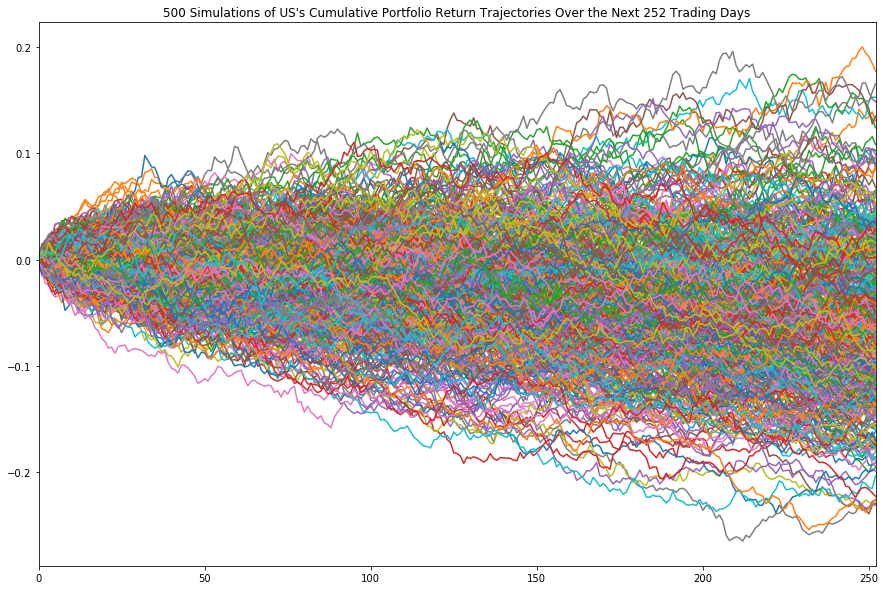

In [18]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))